
# Implement Image Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

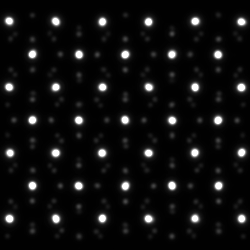

In [2]:
from tensorflow.keras.preprocessing.image import load_img

path = 'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png'
name = '010438.000101-raw.png'
fullname = f'{path}/{name}'
load_img(fullname)

In [3]:
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

# First, a pre trained neural network

In [4]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

model = Xception(weights='imagenet', input_shape=(299, 299, 3))
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [5]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 1s 580ms/step


In [6]:
decode_predictions(pred)

[[('n04591157', 'Windsor_tie', 0.09601379),
  ('n04332243', 'strainer', 0.06694442),
  ('n04264628', 'space_bar', 0.057935324),
  ('n03347037', 'fire_screen', 0.048910584),
  ('n03196217', 'digital_clock', 0.045351155)]]

- So, these are obviously not the correct classifications for the image we gave to the model. What is happening is we are using imagenet as our weights. Imagenet is a database with thousands of images that are used to classify new images. Looks like imagenet does not contain random images of atomic lattices, so it cannot make good predictions on our image

# Let's do it ourselves now, Transfer Learning

- transfer learning is a technique used to create models for completing tasks which then can be reused as the starting point for the second task. The dense layers are retrained each time to be specific to the dataset in question

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

- What follows below is the creation of new folder names in the directory with all the images
- These folders correspond to the desired descriptor that we will be testing for
- In this case we will do the space group names
- We copy all the image files into the folders corresponding to their space group names
- We find each image's space group name through using the reference id provided in the image file name
- now we can follow along with the example of building the convolution neural network model
- the script recognizes these folders as separate classes, allowing it to classify our image files for training

In [8]:
df = pd.read_csv('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/key.csv')
df.head()

,id,icsd_id,ref_id,chemical_name_systematic,chemical_formula_structural,chemical_name_structure_type,symmetry_space_group_name,symmetry_Int_Tables_number,uvw_orient,hkl_orient,filename,publication_title,citation
0,0,4,4.010201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 2, 1)","(0.0, 76.2767, 53.0857)","ICSD_000004-hkl_(0.0, 76.2767, 53.0857)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
1,6,4,4.011200,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -2, 0)","(101.702, -127.12, 0.0)","ICSD_000004-hkl_(101.702, -127.12, 0.0)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
2,7,4,4.021201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(2, -2, 1)","(152.553, -152.55, 53.0857)","ICSD_000004-hkl_(152.553, -152.55, 53.0857)-uv...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
3,9,4,4.010102,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 1, 2)","(25.4255, 25.4255, 106.171)","ICSD_000004-hkl_(25.4255, 25.4255, 106.171)-uv...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
4,11,4,4.011100,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -1, 0)","(76.2767, -76.276, 0.0)","ICSD_000004-hkl_(76.2767, -76.276, 0.0)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."


In [10]:
os.chdir('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png')
filenames = os.listdir('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png')
np.random.shuffle(filenames)
val_filenames = filenames[:int(len(filenames)/4)]
train_filenames = filenames[len(val_filenames):]

val_id=[]
for i in val_filenames:
    val_id = np.append(val_id, i[:13])
val_id = val_id.astype('float')

train_id=[]
for i in train_filenames:
    train_id = np.append(train_id,i[:13])
train_id = train_id.astype('float')

if not os.path.exists('validation'):
        os.makedirs('validation')
if not os.path.exists('train'):
        os.makedirs('train')
        
print(len(val_id)+len(train_id))
print(len(val_filenames)+len(train_filenames))

123
123


In [11]:
space_groups = df['symmetry_space_group_name'].to_numpy()

In [12]:
ref_id = df['ref_id'].to_numpy()

- Let's first go through the train dataset

In [13]:
train_space_groups=[]
for i in np.arange(0,len(train_id),1):
    for j in np.arange(0,len(ref_id),1):
        if train_id[i] == ref_id[j]:
            train_space_groups = np.append(train_space_groups, space_groups[j])
train_space_groups

array(["'Pnma'", "'Fm-3m'", "'Pnma'", "'Pbca'", "'Pbca'", "'Pbca'",
       "'Pm-3m'", "'Pbca'", "'Pnma'", "'Pnnm'", "'Pnma'", "'Pnnm'",
       "'Pnnm'", "'Pnma'", "'Pnma'", "'Pbca'", "'Fm-3m'", "'Fm-3m'",
       "'Pbca'", "'Pbca'", "'Pbca'", "'Pnnm'", "'Pnnm'", "'Pnnm'",
       "'Pnnm'", "'Pbca'", "'Pnma'", "'Pnma'", "'Pnma'", "'Pnnm'",
       "'Pbca'", "'Pbca'", "'Pm-3m'", "'Pbca'", "'Pnnm'", "'Pnma'",
       "'Pm-3m'", "'Pnnm'", "'Fm-3m'", "'Pnma'", "'Pbca'", "'Pnma'",
       "'Pnnm'", "'Pnnm'", "'Pnnm'", "'Pbca'", "'Pnnm'", "'Fm-3m'",
       "'Pnnm'", "'Pnma'", "'Pm-3m'", "'Pnnm'", "'Pnma'", "'Pbca'",
       "'Pm-3m'", "'Fm-3m'", "'Pnma'", "'Pbca'", "'Pnnm'", "'Pnnm'",
       "'Pm-3m'", "'Fm-3m'", "'Pnnm'", "'Pnnm'", "'Pm-3m'", "'Pbca'",
       "'Pnnm'", "'Pm-3m'", "'Pnnm'", "'Fm-3m'", "'Pnma'", "'Pnma'",
       "'Pnma'", "'Pm-3m'", "'Pnnm'", "'Pm-3m'", "'Fm-3m'", "'Pbca'",
       "'Pnma'", "'Pnnm'", "'Pm-3m'", "'Pm-3m'", "'Pnma'", "'Pnnm'",
       "'Fm-3m'", "'Pnnm'", "'Pnnm'", "'P

- now let's do the validation dataset

In [14]:
val_space_groups=[]
for i in np.arange(0,len(val_id),1):
    for j in np.arange(0,len(ref_id),1):
        if val_id[i] == ref_id[j]:
            val_space_groups = np.append(val_space_groups, space_groups[j])
val_space_groups

array(["'Pbca'", "'Pbca'", "'Pbca'", "'Pnma'", "'Pbca'", "'Fm-3m'",
       "'Pnma'", "'Pnma'", "'Pnnm'", "'Pnnm'", "'Pm-3m'", "'Pnma'",
       "'Pbca'", "'Pnma'", "'Pnnm'", "'Pbca'", "'Pnma'", "'Pbca'",
       "'Fm-3m'", "'Pm-3m'", "'Pm-3m'", "'Pm-3m'", "'Fm-3m'", "'Pbca'",
       "'Pnma'", "'Pnma'", "'Pnnm'", "'Pm-3m'", "'Pbca'", "'Pnma'"],
      dtype='<U32')

In [15]:
print(len(val_space_groups)+len(train_space_groups))

123


In [16]:
# so now we have the id_names for the train and val datasets, along with their corresponding space groups
# let's copy those files into the correct dataset folders and space group folders
# start with training...

import shutil
os.chdir('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png')

for i in np.arange(0,len(train_space_groups),1):
    name = train_space_groups[i]
    if not os.path.exists('train/'+name):
        os.makedirs('train/'+name)
    shutil.copyfile(train_filenames[i], 'train/'+name+'/'+train_filenames[i])

In [17]:
# and now for validation...

import shutil
os.chdir('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png')

for i in np.arange(0,len(val_space_groups),1):
    name = val_space_groups[i]
    if not os.path.exists('validation/'+name):
        os.makedirs('validation/'+name)
    shutil.copyfile(val_filenames[i], 'validation/'+name+'/'+val_filenames[i])

- So, we have organized our images into their corresponding space group folders
- Back to creating our neural network

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png/train',
    target_size=(250, 250),
    batch_size=32,
    shuffle=False
)

print(train_ds.class_indices)
X, y = next(train_ds)

Found 93 images belonging to 5 classes.
{"'Fm-3m'": 0, "'Pbca'": 1, "'Pm-3m'": 2, "'Pnma'": 3, "'Pnnm'": 4}


In [19]:
# here we generate a validation set

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png/validation',
    target_size=(250, 250),
    batch_size=32,
    shuffle=False
)

Found 30 images belonging to 5 classes.


In [20]:
num_classes = 5 # SET NUMBER OF CLASSES HERE

base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes)(vectors)

model = keras.Model(inputs, outputs)

In [21]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [22]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 4.7225 - accuracy: 0.0323 - val_loss: 2.6156 - val_accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 2.4168 - accuracy: 0.2258 - val_loss: 2.4520 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.8547 - accuracy: 0.4086 - val_loss: 2.4061 - val_accuracy: 0.3667
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 2.2877 - accuracy: 0.3333 - val_loss: 1.6247 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.6955 - accuracy: 0.6989 - val_loss: 1.5098 - val_accuracy: 0.4667
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.6079 - accuracy: 0.8602 - val_loss: 1.9769 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 1.1647 - accuracy: 0.6667 - val_loss: 2.2101 - val_accuracy: 0.5333
Epoch 8/10
3/3 [=========================

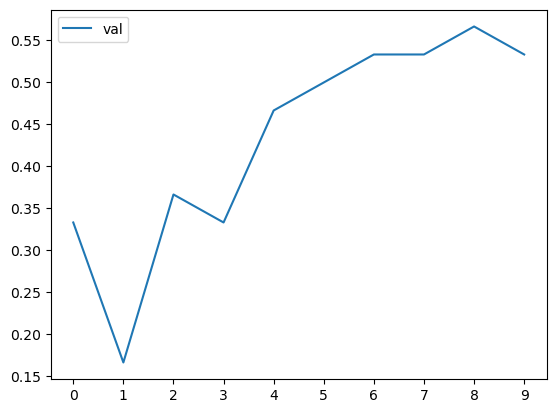

In [23]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

- Learning rate determines the step size of each iteration toward a minimum of the loss function

In [24]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

- now we will test different learning rates

In [27]:
# keep track of the scores
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 1.7231 - accuracy: 0.1505 - val_loss: 1.7066 - val_accuracy: 0.2333
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 1.7001 - accuracy: 0.1720 - val_loss: 1.6925 - val_accuracy: 0.2333
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.6749 - accuracy: 0.1613 - val_loss: 1.6842 - val_accuracy: 0.2333
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.6509 - accuracy: 0.1720 - val_loss: 1.6753 - val_accuracy: 0.2333
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 1.6336 - accuracy: 0.2043 - val_loss: 1.6666 - val_accuracy: 0.2333
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 1.6197 - accuracy: 0.2043 - val_loss: 1.6558 - val_accuracy: 0.3000
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 1.6051 - accuracy: 0.2366 - val_loss: 1.6486 - val_accuracy: 0.3000
Epoch 8/10
3/3 [==================

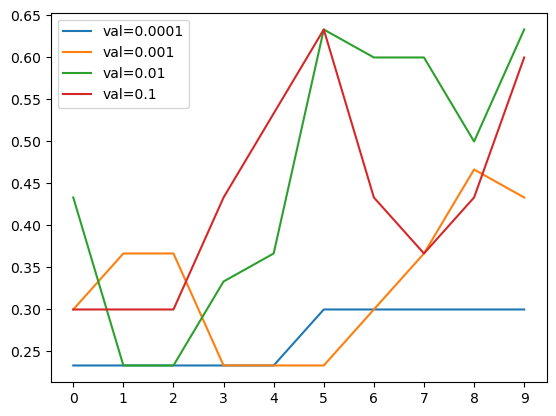

In [28]:
# now, for each learning rate, plot how the accuracy changed for each epoch

for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- it appers that you may want to strike a balance with learning rate
- higher number does not always mean better at each epoch

In [29]:
# let's go with the learning rate value 0.1
# seems overall better than 0.01, which we had in first example
learning_rate = 0.1

## Checkpointing

- So it seems like this code can keep track of each epoch that is calculated and the validation accuracy
- The code will save the best one as it goes
- This way you can choose your best run for your model to use for predictions

In [30]:
os.chdir('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png')

In [31]:
model.save_weights('model_v1.h5', save_format='h5')

In [32]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [33]:
learning_rate = 0.1

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 41.2281 - accuracy: 0.1613 - val_loss: 23.8561 - val_accuracy: 0.1333
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 16.9119 - accuracy: 0.0215 - val_loss: 6.6818 - val_accuracy: 0.2667
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 8.2284 - accuracy: 0.6022 - val_loss: 17.1796 - val_accuracy: 0.1000
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 11.7990 - accuracy: 0.2473 - val_loss: 6.7127 - val_accuracy: 0.3667
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 3.9322 - accuracy: 0.6774 - val_loss: 7.7925 - val_accuracy: 0.4667
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 6.8129 - accuracy: 0.6022 - val_loss: 6.2608 - val_accuracy: 0.5667
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 6.7358 - accuracy: 0.5699 - val_loss: 5.1400 - val_accuracy: 0.6667
Epoch 8/10
3/3 [====================

## Adding more layers

- Add in additional layers to perform intermediate processing of the vector representations

In [34]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(num_classes)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [35]:
learning_rate = 0.1

scores = {}

for size in [1, 10, 100, 500, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

1
Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 6.5063 - accuracy: 0.0000e+00 - val_loss: 1.6081 - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 1.6612 - accuracy: 0.1398 - val_loss: 1.6123 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.6312 - accuracy: 0.1398 - val_loss: 1.6043 - val_accuracy: 0.1667
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.6336 - accuracy: 0.3118 - val_loss: 1.6024 - val_accuracy: 0.1333
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 1.6132 - accuracy: 0.3118 - val_loss: 1.6065 - val_accuracy: 0.1333
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 1.5953 - accuracy: 0.3118 - val_loss: 1.6124 - val_accuracy: 0.1333
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 1.5834 - accuracy: 0.3118 - val_loss: 1.6223 - val_accuracy: 0.1333
Epoch 8/10
3/3 [===================

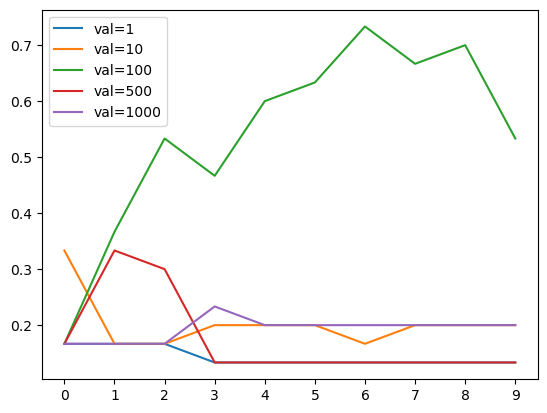

In [36]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
#plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

- Looks like our best, by far here, was a value of 100 for the inner size

## Regularization and dropout

- Dropout prevents overfitting by randomly dropping out nodes of the layer in our training

In [37]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(num_classes)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [38]:
learning_rate = 0.1
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
3/3 [==============================] - 6s 1s/step - loss: 155.7364 - accuracy: 0.0860 - val_loss: 32.5273 - val_accuracy: 0.1333
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 24.6970 - accuracy: 0.1935 - val_loss: 7.3215 - val_accuracy: 0.1333
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 2.3835 - accuracy: 0.3978 - val_loss: 1.5798 - val_accuracy: 0.2667
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 1.5102 - accuracy: 0.4301 - val_loss: 1.8046 - val_accuracy: 0.2667
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 1.4259 - accuracy: 0.4301 - val_loss: 1.7034 - val_accuracy: 0.2667
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 1.3858 - accuracy: 0.4194 - val_loss: 1.6438 - val_accuracy: 0.2333
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 1.3595 - accuracy: 0.4194 - val_loss: 1.6887 - val_accuracy: 0.2333
Epoch 8/30
3/3 [=================

3/3 [==============================] - 3s 1s/step - loss: 1.5673 - accuracy: 0.3118 - val_loss: 1.6411 - val_accuracy: 0.1333
Epoch 30/30
3/3 [==============================] - 3s 1s/step - loss: 1.5657 - accuracy: 0.3118 - val_loss: 1.6458 - val_accuracy: 0.1333




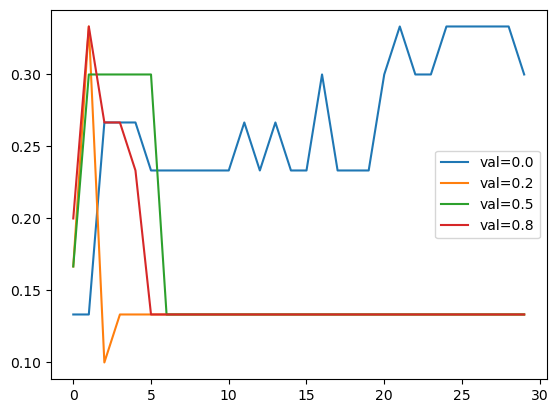

In [41]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))


plt.legend()

## Data Augmentation

- You can make new images generated from old ones to artificially increase dataset size

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [42]:
learning_rate = 0.1
size = 100
droprate = 0.0

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
3/3 [==============================] - 6s 1s/step - loss: 198.7864 - accuracy: 0.0753 - val_loss: 39.3557 - val_accuracy: 0.1667
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 21.3169 - accuracy: 0.2043 - val_loss: 10.3769 - val_accuracy: 0.2333
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 9.2633 - accuracy: 0.0753 - val_loss: 4.7952 - val_accuracy: 0.2333
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 3.9522 - accuracy: 0.3763 - val_loss: 3.2173 - val_accuracy: 0.2667
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 1.5912 - accuracy: 0.3118 - val_loss: 1.6036 - val_accuracy: 0.3333
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 1.5013 - accuracy: 0.2796 - val_loss: 1.5689 - val_accuracy: 0.3333
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 1.5017 - accuracy: 0.2796 - val_loss: 1.5612 - val_accuracy: 0.3333
Epoch 8/50
3/3 [====================

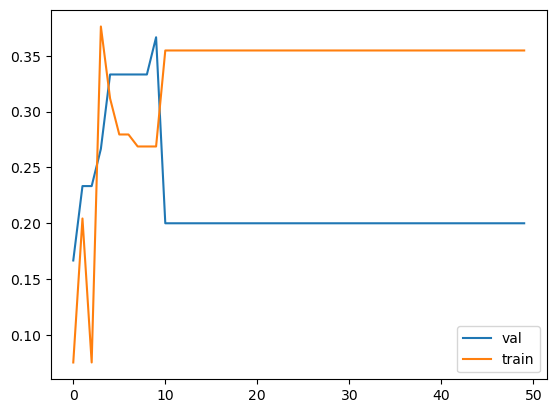

In [43]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Training larger model

In [ ]:
# We increase our input file size

In [58]:
def make_model(input_size=150, learning_rate=0.1, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(5)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [59]:
input_size = 299

In [60]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png/train',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

print(train_ds.class_indices)
X, y = next(train_ds)

Found 93 images belonging to 5 classes.
{"'Fm-3m'": 0, "'Pbca'": 1, "'Pm-3m'": 2, "'Pnma'": 3, "'Pnnm'": 4}


In [61]:
# here we generate a validation set

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 30 images belonging to 5 classes.


In [62]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [63]:
learning_rate = 0.01
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 6.6298 - accuracy: 0.0108 - val_loss: 2.7064 - val_accuracy: 0.2667
Epoch 2/50
3/3 [==============================] - 4s 2s/step - loss: 2.5291 - accuracy: 0.1505 - val_loss: 1.9226 - val_accuracy: 0.2333
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 1.6223 - accuracy: 0.4301 - val_loss: 1.5184 - val_accuracy: 0.5667
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 1.1421 - accuracy: 0.5269 - val_loss: 1.4865 - val_accuracy: 0.5667
Epoch 5/50
3/3 [==============================] - 5s 2s/step - loss: 0.9084 - accuracy: 0.6774 - val_loss: 1.4432 - val_accuracy: 0.4333
Epoch 6/50
3/3 [==============================] - 5s 2s/step - loss: 0.8519 - accuracy: 0.5914 - val_loss: 1.2981 - val_accuracy: 0.5333
Epoch 7/50
3/3 [==============================] - 4s 2s/step - loss: 0.8099 - accuracy: 0.7097 - val_loss: 1.2275 - val_accuracy: 0.5667
Epoch 8/50
3/3 [=========================

# Using the Model

In [79]:
os.chdir('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png')
model = keras.models.load_model('xception_v4_1_28_0.867.h5')

In [80]:
path = 'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png/validation/\'Pbca\''
name = '391225.000001-raw.png'

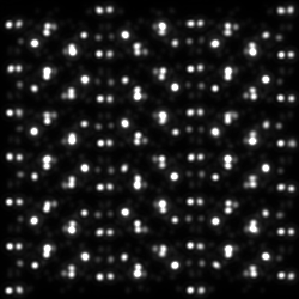

In [82]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img(path +'/'+name, target_size=(299, 299))
img

In [83]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [84]:
X = preprocess_input(X)

In [85]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [86]:
classes = [
    '\'Fm-3m\'',
    '\'Pbca\'',
    '\'Pm-3m\'',
    '\'Pnma\'',
    '\'Pnnm\'',
]

In [87]:
dict(zip(classes, pred[0]))

{"'Fm-3m'": -2.2865126,
 "'Pbca'": 4.002529,
 "'Pm-3m'": -4.3801155,
 "'Pnma'": -0.2237267,
 "'Pnnm'": 2.2414618}

- Looks like the code gives each class a score based on how much the image in question matches with the criteria for each class
- So here it tells us that the Pbca class has the highest score, which makes sense because this is the class the image belongs to
- Let's try a couple others

In [90]:
path = 'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png/validation/\'Pm-3m\''
name = '052227.000001-raw.png'
img = load_img(path +'/'+name, target_size=(299, 299))
x = np.array(img)
X = np.array([x])
X.shape
X = preprocess_input(X)
pred = model.predict(X)
classes = [
    '\'Fm-3m\'',
    '\'Pbca\'',
    '\'Pm-3m\'',
    '\'Pnma\'',
    '\'Pnnm\'',
]
dict(zip(classes, pred[0]))

1/1 [==============================] - 0s 177ms/step


{"'Fm-3m'": -1.9150622,
 "'Pbca'": -18.441778,
 "'Pm-3m'": 13.364686,
 "'Pnma'": -13.663036,
 "'Pnnm'": -18.054684}

In [91]:
path = 'C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/general/png/validation/\'Pnnm\''
name = '411361.000201-stem00-clean.png'
img = load_img(path +'/'+name, target_size=(299, 299))
x = np.array(img)
X = np.array([x])
X.shape
X = preprocess_input(X)
pred = model.predict(X)
classes = [
    '\'Fm-3m\'',
    '\'Pbca\'',
    '\'Pm-3m\'',
    '\'Pnma\'',
    '\'Pnnm\'',
]
dict(zip(classes, pred[0]))

1/1 [==============================] - 0s 215ms/step


{"'Fm-3m'": -4.793273,
 "'Pbca'": -0.862247,
 "'Pm-3m'": -10.176915,
 "'Pnma'": 4.4234333,
 "'Pnnm'": 5.3638573}

- I think the model is doing well at predicting these images

# Let's train a model on a larger dataset

- We use our code we wrote to read in files, compare reference IDs, and save files into folders based on symmetry groups

In [76]:
import pandas as pd
import os
import numpy as np

def make_model(input_size=150, learning_rate=0.1, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(52)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [55]:
df = pd.read_csv('C:/Users/Jacob/OneDrive/Documents/Jupyter/atomagined-master/key.csv')
df.head()

,id,icsd_id,ref_id,chemical_name_systematic,chemical_formula_structural,chemical_name_structure_type,symmetry_space_group_name,symmetry_Int_Tables_number,uvw_orient,hkl_orient,filename,publication_title,citation
0,0,4,4.010201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 2, 1)","(0.0, 76.2767, 53.0857)","ICSD_000004-hkl_(0.0, 76.2767, 53.0857)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
1,6,4,4.011200,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -2, 0)","(101.702, -127.12, 0.0)","ICSD_000004-hkl_(101.702, -127.12, 0.0)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
2,7,4,4.021201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(2, -2, 1)","(152.553, -152.55, 53.0857)","ICSD_000004-hkl_(152.553, -152.55, 53.0857)-uv...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
3,9,4,4.010102,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 1, 2)","(25.4255, 25.4255, 106.171)","ICSD_000004-hkl_(25.4255, 25.4255, 106.171)-uv...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
4,11,4,4.011100,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -1, 0)","(76.2767, -76.276, 0.0)","ICSD_000004-hkl_(76.2767, -76.276, 0.0)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."


In [57]:
os.chdir('C:/Users/Jacob/Documents/atomagined/png')
filenames = os.listdir('C:/Users/Jacob/Documents/atomagined/png')
np.random.shuffle(filenames)
val_filenames = filenames[:int(len(filenames)/4)]
test_filenames = filenames[len(val_filenames):len(val_filenames)+int(len(filenames)/4)]
train_filenames = filenames[(len(val_filenames)+len(test_filenames)):]

val_id=[]
for i in val_filenames:
    val_id = np.append(val_id, i[:13])
val_id = val_id.astype('float')

train_id=[]
for i in train_filenames:
    train_id = np.append(train_id,i[:13])
train_id = train_id.astype('float')

test_id=[]
for i in test_filenames:
    test_id = np.append(test_id,i[:13])
test_id = test_id.astype('float')

if not os.path.exists('validation'):
        os.makedirs('validation')
if not os.path.exists('train'):
        os.makedirs('train')
if not os.path.exists('test'):
        os.makedirs('test')
        
print(len(val_filenames)+len(train_filenames)+len(test_filenames))

3619


In [58]:
space_groups = df['symmetry_space_group_name'].to_numpy()
ref_id = df['ref_id'].to_numpy()

In [59]:
train_space_groups=[]
for i in np.arange(0,len(train_id),1):
    for j in np.arange(0,len(ref_id),1):
        if train_id[i] == ref_id[j]:
            train_space_groups = np.append(train_space_groups, space_groups[j])
train_space_groups

array(["'P1211'", "'Pbca'", "'C222'", ..., "'Pnma'", "'P121/c1'",
       "'P121/n1'"], dtype='<U32')

In [60]:
val_space_groups=[]
for i in np.arange(0,len(val_id),1):
    for j in np.arange(0,len(ref_id),1):
        if val_id[i] == ref_id[j]:
            val_space_groups = np.append(val_space_groups, space_groups[j])
val_space_groups

array(["'P121/m1'", "'P-1'", "'Pnma'", "'C12/m1'", "'I41/amdZ'", "'P1n1'",
       "'R-3H'", "'F-43m'", "'Cmmm'", "'R3mH'", "'C12/c1'", "'P-1'",
       "'F222'", "'I4/mcm'", "'Pnnm'", "'Pnca'", "'I4/mmm'", "'Pbam'",
       "'Pnnm'", "'P-1'", "'P121/c1'", "'R-3mH'", "'P-1'", "'I4/mmm'",
       "'P121/c1'", "'C12/c1'", "'P121/c1'", "'Pnma'", "'Pn21m'",
       "'Fdd2'", "'Immm'", "'C12/m1'", "'P121/c1'", "'P63/mmc'",
       "'P12/n1'", "'Pnma'", "'P121/c1'", "'Cmca'", "'C12/c1'",
       "'P212121'", "'Im-3'", "'C12/m1'", "'P4/nZ'", "'R-3mH'", "'P-1'",
       "'P121/c1'", "'P63/mmc'", "'C12/c1'", "'P-1'", "'Cmc21'",
       "'FdddZ'", "'P1'", "'C12/m1'", "'C12/m1'", "'C222'", "'Immm'",
       "'P121/c1'", "'P-1'", "'F-43m'", "'P1n1'", "'P63mc'", "'P42/nmcS'",
       "'C222'", "'F222'", "'P1211'", "'P-3c1'", "'C12/c1'", "'C12/m1'",
       "'C12/c1'", "'Pna21'", "'Pnnm'", "'R-3mH'", "'P-1'", "'C12/m1'",
       "'P4/nZ'", "'P12/n1'", "'C12/m1'", "'P121/n1'", "'P-1'", "'P-1'",
       "'P121/c1'"

In [61]:
test_space_groups=[]
for i in np.arange(0,len(test_id),1):
    for j in np.arange(0,len(ref_id),1):
        if test_id[i] == ref_id[j]:
            test_space_groups = np.append(test_space_groups, space_groups[j])
test_space_groups

array(["'P1'", "'Pnma'", "'P-1'", "'C12/m1'", "'P-3m1'", "'C12/c1'",
       "'P-1'", "'C12/c1'", "'Pnn2'", "'Bmmb'", "'C12/m1'", "'Pm-3m'",
       "'P1211'", "'P1211'", "'P121/c1'", "'P-1'", "'P42/nmcS'",
       "'I12/c1'", "'P-1'", "'Cmca'", "'P63/m'", "'Pnma'", "'C12/c1'",
       "'P12/n1'", "'Amm2'", "'P63/mmc'", "'Pn21m'", "'P121/m1'", "'P-1'",
       "'FdddZ'", "'P212121'", "'P121/c1'", "'P121/n1'", "'R-3mH'",
       "'P-1'", "'P121/c1'", "'Fdd2'", "'P1121/a'", "'P121/n1'",
       "'P12/n1'", "'P1n1'", "'P63mc'", "'C12/c1'", "'Pnma'", "'Pnma'",
       "'Pnnm'", "'P1n1'", "'P63/mmc'", "'Pbmn'", "'P121/c1'", "'C12/c1'",
       "'R-3mH'", "'P-1'", "'P1121/a'", "'P-1'", "'R-3H'", "'R-3H'",
       "'P-1'", "'P1n1'", "'P1121/a'", "'P63/mmc'", "'P-1'", "'C12/c1'",
       "'Pbca'", "'P63/mmc'", "'C12/c1'", "'R-3mH'", "'P121/c1'",
       "'P63/m'", "'P1'", "'C12/m1'", "'P-1'", "'Cmcm'", "'C12/m1'",
       "'I4/mmm'", "'Pnnm'", "'Pbmn'", "'P-1'", "'P-1'", "'P1n1'",
       "'C12/m1'", "'P-1'

In [62]:
import shutil
os.chdir('C:/Users/Jacob/Documents/atomagined/png')

for i in np.arange(0,len(train_space_groups),1):
    name = train_space_groups[i]
    if not os.path.exists('train/'+name):
        os.makedirs('train/'+name)
    shutil.copyfile(train_filenames[i], 'train/'+name+'/'+train_filenames[i])

In [63]:
import shutil
os.chdir('C:/Users/Jacob/Documents/atomagined/png')

for i in np.arange(0,len(val_space_groups),1):
    name = val_space_groups[i]
    if not os.path.exists('validation/'+name):
        os.makedirs('validation/'+name)
    shutil.copyfile(val_filenames[i], 'validation/'+name+'/'+val_filenames[i])

In [64]:
import shutil
os.chdir('C:/Users/Jacob/Documents/atomagined/png')

for i in np.arange(0,len(test_space_groups),1):
    name = test_space_groups[i]
    if not os.path.exists('test/'+name):
        os.makedirs('test/'+name)
    shutil.copyfile(test_filenames[i], 'test/'+name+'/'+test_filenames[i])

In [72]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    'C:/Users/Jacob/Documents/atomagined/png/train',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

print(train_ds.class_indices)
X, y = next(train_ds)

Found 1809 images belonging to 52 classes.
{"'Amm2'": 0, "'Bmmb'": 1, "'C12": 2, "'C222'": 3, "'Cmc21'": 4, "'Cmca'": 5, "'Cmcm'": 6, "'Cmmm'": 7, "'F-43m'": 8, "'F222'": 9, "'Fdd2'": 10, "'FdddZ'": 11, "'Fm-3m'": 12, "'I-4m2'": 13, "'I12": 14, "'I1m1'": 15, "'I4": 16, "'I41": 17, "'Im-3'": 18, "'Immm'": 19, "'P-1'": 20, "'P-3c1'": 21, "'P-3m1'": 22, "'P1'": 23, "'P1121": 24, "'P12": 25, "'P121": 26, "'P1211'": 27, "'P1n1'": 28, "'P212121'": 29, "'P3221'": 30, "'P3m1'": 31, "'P4": 32, "'P42": 33, "'P6": 34, "'P63": 35, "'P63mc'": 36, "'Pa-3'": 37, "'Pbam'": 38, "'Pbca'": 39, "'Pbmn'": 40, "'Pbnm'": 41, "'Pmm2'": 42, "'Pn21m'": 43, "'Pna21'": 44, "'Pnca'": 45, "'Pnma'": 46, "'Pnn2'": 47, "'Pnnm'": 48, "'R-3H'": 49, "'R-3mH'": 50, "'R3mH'": 51}


In [73]:
# here we generate a validation set

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'C:/Users/Jacob/Documents/atomagined/png/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 904 images belonging to 52 classes.


In [74]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    'C:/Users/Jacob/Documents/atomagined/png/test',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 903 images belonging to 52 classes.


In [75]:
import keras
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [78]:
learning_rate = 0.005
size = 100
droprate = 0.2

model = make_model(
    input_size=250,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=30, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/30
57/57 [==============================] - 48s 817ms/step - loss: 3.9912 - accuracy: 0.1183 - val_loss: 3.5446 - val_accuracy: 0.1394
Epoch 2/30
57/57 [==============================] - 49s 866ms/step - loss: 3.4393 - accuracy: 0.1520 - val_loss: 3.2890 - val_accuracy: 0.1626
Epoch 3/30
57/57 [==============================] - 47s 822ms/step - loss: 3.3546 - accuracy: 0.1493 - val_loss: 3.2780 - val_accuracy: 0.1704
Epoch 4/30
57/57 [==============================] - 46s 812ms/step - loss: 3.2837 - accuracy: 0.1470 - val_loss: 3.2611 - val_accuracy: 0.1626
Epoch 5/30
57/57 [==============================] - 46s 812ms/step - loss: 3.2073 - accuracy: 0.1647 - val_loss: 3.1572 - val_accuracy: 0.1726
Epoch 6/30
57/57 [==============================] - 140s 2s/step - loss: 3.1424 - accuracy: 0.1968 - val_loss: 3.1469 - val_accuracy: 0.2035
Epoch 7/30
57/57 [==============================] - 177s 3s/step - loss: 3.0838 - accuracy: 0.1802 - val_loss: 3.2107 - val_accuracy: 0.2223
Epo

KeyboardInterrupt: 

- I am having trouble getting this to work well on a larger dataset
- I downloaded the full dataset for the lattice images, and had to delete most since there were so many images
- Deleting lots of the data definitely altered the content a bit, I had less symmetry groups represented then
- of course, having this much data also causes each epoch to have a longer calculation time, as seen above (I was also running a VM alongside which was hogging computing resources)
- But my scripts worked decently well with the smaller dataset provided by atomagined

- I also had to go through a manually delete some symmetry folders created since sometimes the train dataset would end up with a few symmetry groups represented which the validation dataset did not have. Just the way the data was organized in my files, I suppose. The scripts don't like it when you can't tell it the exact number of classes you have for the data.